# Statistical error anlysis for the experiment with differnt seeds

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

In [2]:
experiment_name='different_seeds_experiment'


In [3]:
import numpy as np
import torch
import pyro

# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False
# pyro_seed= 68

In [4]:
# from config import sample_size,epochs


In [5]:
# # def SCM(epsilon=None,intervention=False, *args):
# #    X_4=2*epsilon[:,4]+1
# #    X_6=epsilon[:,6]-1
# #    if not intervention:
# #        X_5=3*X_6+epsilon[:,5]-1
# #    else:
# #        X_5=np.full(sample_size,args)
# #    X_2=X_5-epsilon[:,2]
# #    X_3=-3*X_4+epsilon[:,3]-3
# #    X_1=X_6-X_5+3*epsilon[:,1]
# #    Y=X_1+2*X_2-3*X_3+epsilon[:,0]
# #    return X_6,X_5,X_4,X_3,X_2,X_1,Y

# from scm import SCM

In [6]:
# from full_model import conditionalscm
# from partial_model import conditionalscm_partial

In [7]:
# from train import train_model 
#from config import save

In [8]:
#save='logs_2'
# from infer import do_inference
# from analysis import error_estimate ,sampling_capabilities, noise_infer_capabilities
# from analysis import plot_Y_cf
# from cf_analysis import cf_analysis
# import pandas as pd
# from matplotlib import pyplot as plt
# import seaborn as sns
# import os

In [1]:
# np.random.seed(1729)
# intervention_set=np.random.uniform(-30,30,200)
# print(intervention_set)

In [10]:
# seeds=[1729, 9, 83,689,251]#,558,12,5692,23, 7]
# pyro_seed= 68
# time_full=[]
# time_partial=[]


In [2]:
# for seed in seeds:
#     print("seed no:",seed,'-----------------------------Start')
#     np.random.seed(seed)
#     torch.manual_seed(seed)
#     #pyro.set_rng_seed(pyro_seed)
#     epsilon=np.random.normal(0,1,(sample_size,7))
#     X_6,X_5,X_4,X_3,X_2,X_1,Y= SCM(epsilon=epsilon,intervention=False)
#     Data={'X6':torch.tensor(X_6).reshape(-1,1).float(),'X5':torch.tensor(X_5).reshape(-1,1).float(),'X4':torch.tensor(X_4).reshape(-1,1).float(),'X3':torch.tensor(X_3).reshape(-1,1).float(),'X2':torch.tensor(X_2).reshape(-1,1).float(),'X1':torch.tensor(X_1).reshape(-1,1).float(),'Y':torch.tensor(Y).reshape(-1,1).float()}
   
#     scm=conditionalscm()
#     scm_partial=conditionalscm_partial()
    
#     pyro.set_rng_seed(pyro_seed)
#     logs=experiment_name + '/logs/seed_'+str(seed)
#     if not os.path.exists(logs):
#         os.makedirs(logs)
    
#     time_fullmodel=train_model(scm,logs,seed=seed,data=Data,print_mode=False)
#     time_full.append(time_fullmodel)
#     time_partialmodel=train_model(scm_partial,logs,seed=seed,data=Data,print_mode=False)
#     time_partial.append(time_partialmodel)
#     j= 5
#     intervention='do(X5='+str(j)+')'
#     X6_cf,X5_cf, X4_cf, X3_cf, X2_cf, X1_cf, Y_cf= SCM(epsilon,True,j)
    
#     #logs='./'+save
#     SCM_samples,SCM_inferred_noise,SCM_counterfactuals=                       do_inference(scm,intervention,save=logs,data=Data,print_mode=False)
#     SCM_partial_samples,SCM_partial_inferred_noise,SCM_partial_counterfactuals=do_inference(scm_partial,intervention,save=logs,data=Data,print_mode=False)
    
#     path=experiment_name+'/assets/seed_'+str(seed)
#     if not os.path.exists(path):
#         os.makedirs(path)
        
#     path=path+'/'
#     sampling_capabilities(Data=Data,SCM_samples=SCM_samples,SCM_partial_samples=SCM_partial_samples,path=path)
#     noise_infer_capabilities(epsilon=epsilon,SCM_partial_inferred_noise=SCM_partial_inferred_noise,SCM_inferred_noise=SCM_inferred_noise,path=path )
#     plot_Y_cf(Y_cf=Y_cf,j=j,SCM_partial_counterfactuals=SCM_partial_counterfactuals,SCM_counterfactuals=SCM_counterfactuals,path=path)
#     error_fullmodel,error_partialmodel=cf_analysis(intervention_set=intervention_set,path=logs,data=Data,SCM=SCM,scm=scm,scm_partial=scm_partial,epsilon=epsilon)
    
#     if seed==seeds[0]:
#         cf_error=pd.DataFrame({'intervention':intervention_set,'error_partial':error_partialmodel,'error_full': error_fullmodel,'seed':seed})
#     else:
#         cf_error2=pd.DataFrame({'intervention':intervention_set,'error_partial':error_partialmodel,'error_full': error_fullmodel,'seed':seed})
#         cf_error=cf_error.append(cf_error2,ignore_index=True)
        
#     np.random.seed(seed+1)
    
#     epsilon_unseen=np.random.normal(0,1,(sample_size,7))
#     #print(epsilon==epsilon_unseen)
#     X_6,X_5,X_4,X_3,X_2,X_1,Y= SCM(epsilon_unseen,False)
#     Data_unseen={'X6':torch.tensor(X_6).reshape(-1,1).float(),'X5':torch.tensor(X_5).reshape(-1,1).float(),'X4':torch.tensor(X_4).reshape(-1,1).float(),'X3':torch.tensor(X_3).reshape(-1,1).float(),'X2':torch.tensor(X_2).reshape(-1,1).float(),'X1':torch.tensor(X_1).reshape(-1,1).float(),'Y':torch.tensor(Y).reshape(-1,1).float()}
#     unseenerror_fullmodel,unseenerror_partialmodel=cf_analysis(intervention_set=intervention_set,data=Data_unseen,path=logs,SCM=SCM,scm=scm,scm_partial=scm_partial,epsilon=epsilon_unseen)
#     if seed==seeds[0]:
#         unseen_cf_error=pd.DataFrame({'intervention':intervention_set,'error_partial':unseenerror_partialmodel,'error_full': unseenerror_fullmodel,'seed':seed})
#     else:
#         unseen_cf_error2=pd.DataFrame({'intervention':intervention_set,'error_partial':unseenerror_partialmodel,'error_full': unseenerror_fullmodel,'seed':seed})
#         unseen_cf_error=unseen_cf_error.append(unseen_cf_error2,ignore_index=True)
    
        
#     print("seed no:",seed,'--------------------------------Completed')

In [ ]:
# training_time=pd.DataFrame({'full_model':time_full,'partial_model':time_partial,'seed':seeds})
# filepath=experiment_name+'/training_time.csv'
# training_time.to_csv(filepath)
# training_time

In [ ]:
#print(cf_error)
# filepath_=experiment_name+'/cf_error.csv'
# cf_error.to_csv(filepath_)
# cf_error

In [3]:
import pandas as pd 
cf_error=pd.read_csv(experiment_name+'/cf_error.csv')
cf_error

,Unnamed: 0,intervention,error_partial,error_full,seed
0,0,-17.270484,0.031129,0.007893,1729
1,1,-14.458906,0.025628,0.005440,1729
2,2,-4.588687,0.004644,0.002548,1729
3,3,13.179661,0.044055,0.132686,1729
4,4,11.535056,0.039594,0.108455,1729
...,...,...,...,...,...
1995,1995,29.711263,0.135899,0.152623,7
1996,1996,-3.429594,0.004179,0.004229,7
1997,1997,-3.816202,0.003851,0.004425,7
1998,1998,-4.362043,0.003186,0.004800,7


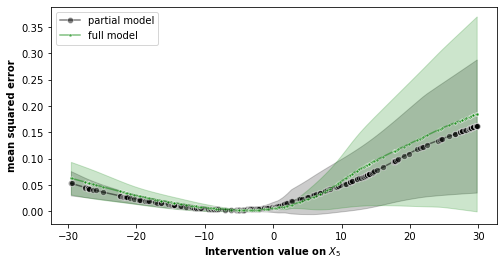

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

#sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8, 4))
#plt.scatter(intervention_set,np.exp(np.array(error_partial)),label='partial model',color='black',ls='-',marker='o')
#plt.scatter(intervention_set,np.exp(np.array(error_full)),label='full model',color='yellow',ls='--',marker='*')
sns.lineplot(data=cf_error,x='intervention',y='error_partial',label='partial model',color='black',marker='o',alpha=0.5,ci='sd')
sns.lineplot(data=cf_error,x='intervention',y='error_full',label='full model',color='green',marker='.',alpha=0.5,ci='sd')

plt.xlabel(r'Intervention value on $X_{5}$ ',fontweight='bold')
plt.ylabel('mean squared error',fontweight='bold')
plt.legend(loc="upper left")
fig.savefig(experiment_name+'/counterfactual_errors.pdf',format='pdf',pad_inches=0.1,bbox_inches='tight',dpi=1200)

In [ ]:
# filepath_=experiment_name+'/unseen_cf_error.csv'
# unseen_cf_error.to_csv(filepath_)
# unseen_cf_error

In [14]:
unseen_cf_error=pd.read_csv(experiment_name+'/unseen_cf_error.csv')
unseen_cf_error

,Unnamed: 0,intervention,error_partial,error_full,seed
0,0,-17.270484,0.031220,0.007958,1729
1,1,-14.458906,0.025709,0.005525,1729
2,2,-4.588687,0.004767,0.002596,1729
3,3,13.179661,0.043963,0.134346,1729
4,4,11.535056,0.039501,0.110294,1729
...,...,...,...,...,...
1995,1995,29.711263,0.136631,0.154452,7
1996,1996,-3.429594,0.004085,0.004275,7
1997,1997,-3.816202,0.003776,0.004475,7
1998,1998,-4.362043,0.003181,0.004856,7


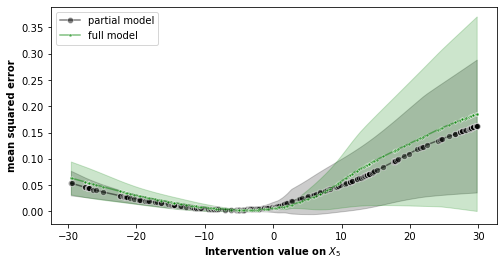

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

#sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8, 4))
#plt.scatter(intervention_set,np.exp(np.array(error_partial)),label='partial model',color='black',ls='-',marker='o')
#plt.scatter(intervention_set,np.exp(np.array(error_full)),label='full model',color='yellow',ls='--',marker='*')
sns.lineplot(data=unseen_cf_error,x='intervention',y='error_partial',label='partial model',color='black',marker='o',alpha=0.5,ci='sd')
sns.lineplot(data=unseen_cf_error,x='intervention',y='error_full',label='full model',color='green',marker='.',alpha=0.5,ci='sd')

plt.xlabel(r'Intervention value on $X_{5}$ ',fontweight='bold')
plt.ylabel('mean squared error',fontweight='bold')
plt.legend(loc="upper left")
fig.savefig(experiment_name+'/counterfactual_unseen_errors.pdf',format='pdf',pad_inches=0.1,bbox_inches='tight',dpi=1200)

### Training time analysis

In [15]:
import pandas as pd 
training_time=pd.read_csv(experiment_name+'/training_time.csv')
training_time=training_time.drop('Unnamed: 0',axis=1)
print('Training time: \n mean:\n',training_time[['full_model','partial_model']].mean())
print('std:\n',training_time[['full_model','partial_model']].std())

Training time: 
 mean:
 full_model       11.223543
partial_model     6.462231
dtype: float64
std:
 full_model       0.081942
partial_model    0.033946
dtype: float64
